In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statistics
plt.rc('figure', facecolor='w', figsize=[4,3])

In [2]:
ksizes = list(map(int,"11 15 20 25 50 100 200 500".split()))

data_jellyfish = []
for k in ksizes:
    nb_items = 0
    nb_missing = 0
    for line in open(f"jellyfish-k{k}.reads_stats"):
        median,mean,stdev = map(float,line.split())
        data_jellyfish += [(k,median,mean,stdev)]

ksizes = list(map(int,"2 4 6 8 10 12 15 20".split()))

data_kminmers = []
for k in ksizes:
    nb_items = 0
    nb_missing = 0
    for line in open(f"HG002-kminmer-abundance-in-CHM13v2-k{k}.50k.read_stats"):
        median,mean,stdev = map(float,line.split())
        data_kminmers  += [(k,median,mean,stdev)]

          k  median          mean          stdev
0        11  1798.0   8920.240963   87653.696869
1        11  1597.0  13758.480866  127348.175335
2        11  1348.0   8629.771923   93916.161427
3        11  1580.5   9688.066185   79202.859995
4        11  1937.5  22172.133009  137609.744866
...     ...     ...           ...            ...
399995  500     0.0      0.022354       0.147834
399996  500     0.0      0.000000       0.000000
399997  500     0.0      0.034508       0.182532
399998  500     0.0      0.409298       0.491713
399999  500     0.0      0.000000       0.000000

[400000 rows x 4 columns]


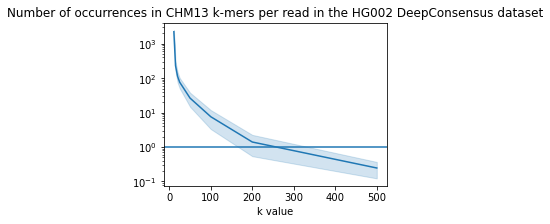

In [3]:
df = pd.DataFrame([x for x in data_jellyfish],columns=("k","median","mean","stdev"))
print(df)
sns_plot = sns.lineplot(data=df,x="k", y="median", errorbar=('se',10))
sns_plot.set(yscale="log")
#ylabels = ['{:}%'.format(int(x*100))  for x in sns_plot.get_yticks()]
#sns_plot.set_yticklabels(ylabels)
#plt.xticks(sns_plot.get_xticks(), list(map(lambda x:"%d"%x,sns_plot.get_xticks())))
sns_plot.set(xlabel='k value', ylabel='')
plt.title('Number of occurrences in CHM13 k-mers per read in the HG002 DeepConsensus dataset')
sns_plot.axhline(1)
fig = sns_plot.get_figure()
plt.show()

fig.savefig("seeds_abundances_ref_kmers.pdf", bbox_inches='tight', dpi =300)


         k  median       mean       stdev
0        2     1.0  12.034375  131.991956
1        2     1.0  17.670455  212.082189
2        2     1.0  11.958491  179.008026
3        2     1.0  34.836364  140.598300
4        2     1.0  35.799363  269.297526
...     ..     ...        ...         ...
399995  20     0.0   0.323034    0.468294
399996  20     0.0   0.381098    0.486399
399997  20     0.0   0.379947    0.486015
399998  20     0.0   0.298462    0.458289
399999  20     0.0   0.491803    1.076406

[400000 rows x 4 columns]


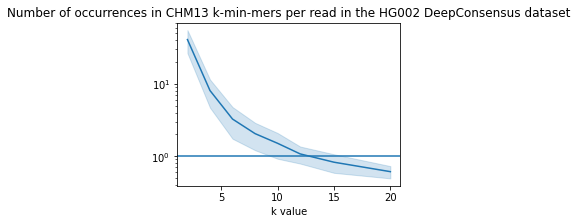

In [4]:
df = pd.DataFrame([x for x in data_kminmers],columns=("k","median","mean","stdev"))
print(df)
sns_plot = sns.lineplot(data=df,x="k", y="median", errorbar=('se',10))
sns_plot.set(yscale="log")
#ylabels = ['{:}%'.format(int(x*100))  for x in sns_plot.get_yticks()]
#sns_plot.set_yticklabels(ylabels)
#plt.xticks(sns_plot.get_xticks(), list(map(lambda x:"%d"%x,sns_plot.get_xticks())))
sns_plot.set(xlabel='k value', ylabel='')
plt.title('Number of occurrences in CHM13 k-min-mers per read in the HG002 DeepConsensus dataset')
sns_plot.axhline(1)
fig = sns_plot.get_figure()
plt.show()

fig.savefig("seeds_abundances_ref_kminmers.pdf", bbox_inches='tight', dpi =300)

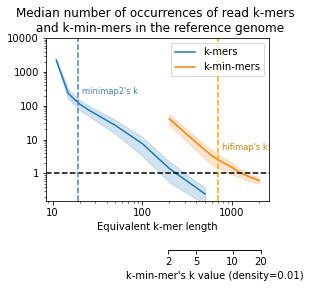

In [13]:
#attempt to merge both plots

def k_to_kspan(k):
    density=0.01
    return k/density

data = []
for (k,median,mean,stdev) in data_jellyfish:
    data += [(k,median,"k-mers")]
for (k,median,mean,stdev) in data_kminmers:
    kspan = k_to_kspan(k)
    data += [(kspan,median,"k-min-mers")]

df = pd.DataFrame(data,columns=("k","median","type"))
  
sns_plot = sns.lineplot(df,x="k", y="median",hue="type", errorbar=('se',10))
sns_plot.set(yscale="log")
sns_plot.set(xscale="log")
plt.ylim(0.15, 10000)
from matplotlib.ticker import FuncFormatter
f = lambda x, pos: f'{int(x)}'
sns_plot.yaxis.set_major_formatter(FuncFormatter(f))
sns_plot.xaxis.set_major_formatter(FuncFormatter(f))
#sns_plot.set(xticks=[x/100 for x in range(0,10+1,2)])
#sns_plot.set_xticklabels([str(x-2) for x in range(0,10+3,2)])
#plt.xticks(sns_plot.get_xticks(), sns_plot.get_xticks() * 100)
sns_plot.set(xlabel='Equivalent k-mer length', ylabel='')
sns_plot.get_legend().remove()
plt.legend(loc='upper right')
plt.title('Median number of occurrences of read k-mers \n and k-min-mers in the reference genome')
sns_plot.axhline(1, color='k', linestyle='--')
sns_plot.axvline(19, color='steelblue', linestyle='--')
sns_plot.axvline(k_to_kspan(7), color='orange', linestyle='--')
plt.text(89, 225, "minimap2's k", horizontalalignment='right', size='small', color='steelblue')
plt.text(2485, 5, "hifimap's k", horizontalalignment='right', size='small', color='darkgoldenrod')

fig = sns_plot.get_figure()
# create second Axes. Note the 0.0 height
ax2 = fig.add_axes((0.55,-0.1,0.32,0.0))  # i didn't determine those params automatically, these are just empirically set
ax2.yaxis.set_visible(False) # hide the yaxis
def tick_function(X):
    ksizes = list(map(int,"2 5 10 20".split()))
    return ["%d" % (ksizes[i]) for i,z in enumerate(X)]
import math
new_tick_locations = list(map(lambda x:math.log(x)/math.log(1.01),np.array([.1,0.2, .5,1.01])))
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel("k-min-mer's k value (density=0.01)")
plt.show()

fig.savefig("seeds_abundances_to_ref.pdf", bbox_inches='tight', dpi =300)
